# TP3 - Support vector machines

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('mnist-original')

from sklearn.svm import SVC

from sklearn import model_selection

import numpy as np

import matplotlib.pyplot as plt

#### Les paramètres principaux de la classe SVC sont les suivants :

     c: ‘’cost’’ est un paramètre de tolérance aux erreurs.
     kernel (par défaut = 'rbf', Radial Basis Function ): spécifie le type de noyau à utiliser dans l'algorithme (‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’).
     decision_function_shape : ‘ovo’, ‘ovr’, default=’ovr’. Il existe plusieurs façons d’étendre directement les méthodes du cas binaire : "Un contre un : ‘ovo’ ", dans le cas où l’on cherche à prédire un label pouvant prendre K ≥ 3 classes, on peut considérer toutes les paires de labels possibles. Si K est le nombre de classes, alors nous aurons K * (K - 1) / 2 classifieurs pour chacune d’entre elles. La prédiction correspond alors au label qui a gagné le plus de "duels". "Un contre tous ’ovr’" dans le cas où on apprend un classifieur a entre les populations Y = k et Y ≠ k. A partir des estimations des probabilités a posteriori, on affecte le label estimé le plus probable.
     Gamma (par défaut = 'auto') : est un coefficient utilisé dans les noyaux 'rbf', 'poly' et 'sigmoïde'. On prendra la valeur ‘auto’. 

In [2]:
#Diviser la base de données à 70% pour l’apprentissage (training) et à 30% pour les tests

ech = np.random.randint(70000, size=5000)

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data[ech], mnist.target[ech],
train_size=0.7)

/Users/admin/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
clsvm = SVC(kernel='linear')

In [4]:
clsvm.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
clsvm.score(xtest,ytest)

0.91733333333333333

In [6]:
%%time
# En fonction des fonctions noyaux : ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’. 

kernelFunctions = ['poly', 'rbf', 'sigmoid', 'linear']
precisions = []

for i in kernelFunctions :
    clsvmTest = SVC(kernel=i)
    clsvmTest.fit(xtrain, ytrain)
    scoreTest = clsvmTest.score(xtest, ytest)
    precisions.append(scoreTest)


CPU times: user 49.1 s, sys: 112 ms, total: 49.2 s
Wall time: 49.3 s


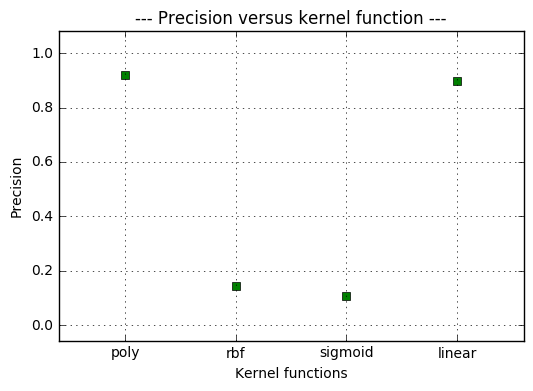

In [7]:
test = ['poly', 'rbf', 'sigmoid', 'linear']
xn = range(len(test))
plt.plot(xn,precisions, 'gs')
plt.xticks(xn, test)
plt.xlabel("Kernel functions")
plt.ylabel("Precision")
plt.margins(0.2,0.2)
plt.grid()
plt.title("--- Precision versus kernel function ---")
plt.show()

In [8]:
%%time
#Faites varier le paramètre de tolérance aux erreurs C (5 valeurs entre 0.1 et 1)
tolerance = [0.1,0.3,0.45,0.6,0.85,1]
precisions = []

for i in tolerance :
    clsvmC = SVC(C=i)
    clsvmC.fit(xtrain, ytrain)
    scoreC = clsvmC.score(xtest, ytest)
    precisions.append(scoreC)

CPU times: user 2min 7s, sys: 317 ms, total: 2min 7s
Wall time: 2min 7s


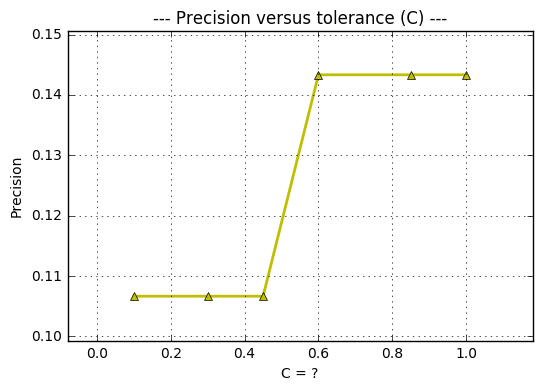

In [9]:
plt.plot(tolerance,precisions, 'y^-', linewidth=2.0)
plt.xlabel("C = ?")
plt.ylabel("Precision")
plt.margins(0.2, 0.2)
plt.grid()
plt.title("--- Precision versus tolerance (C) ---")
plt.show()

## Matrice de confusion

In [11]:
from sklearn.metrics import confusion_matrix

clsvmM = SVC(kernel='linear')
clsvmM.fit(xtrain, ytrain)
ytest_pred = clsvmM.predict(xtest)
cm = confusion_matrix(ytest, ytest_pred) 
print(cm)

[[132   0   1   0   0   2   0   0   0   0]
 [  0 154   1   1   1   1   0   1   0   0]
 [  0   2 137   8   4   1   1   4   3   1]
 [  0   3   1 137   0   2   0   0   7   1]
 [  1   0   0   0 123   0   0   0   0   4]
 [  3   3   1   2   2 126   1   0   3   3]
 [  2   1   0   0   0   0 139   1   0   0]
 [  1   1   5   3   3   0   2 156   0   6]
 [  1   7   0   6   0   2   0   1 134   1]
 [  0   0   0   2   9   0   0   1   0 138]]


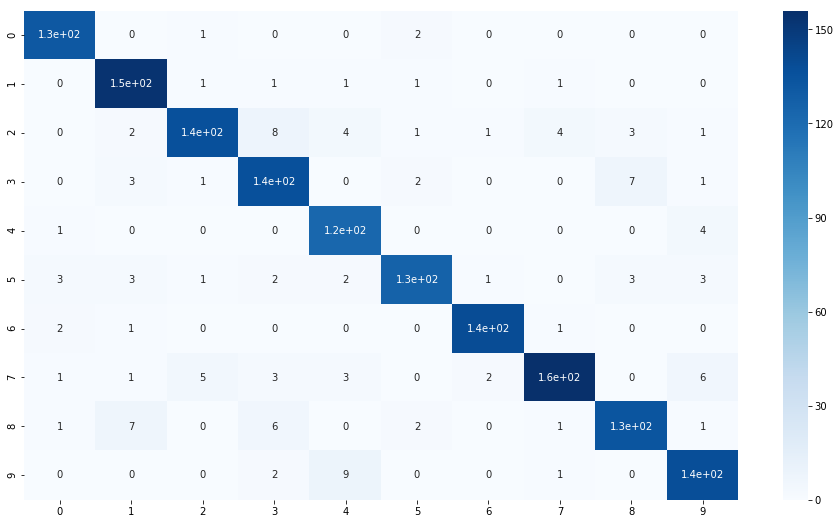

In [32]:
import seaborn as sn

plt.figure(figsize=(16,9))
sn.heatmap(cm, cmap="Blues", annot=True)
plt.show()